# Gradient Boosting regression

In [2]:
%matplotlib inline

In [3]:
import math
import pickle

import numpy as np

import matplotlib.pyplot as plt

In [4]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [5]:
feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

# Analysis of Nodes

In [6]:
from illumine.woodland import breakdown_tree

unique_node_cnts = dict()
cumsum_node_values = dict()
mean_node_values = dict()
n_total_nodes = 0

for estimator in clf.estimators_:
    estimator = estimator.ravel()[0]
    estimator_nodes = breakdown_tree(estimator, feature_names,
                                     display_relation=True)
    
    for node in estimator_nodes:
        n_total_nodes += 1
        node_path = node.get_path()
        unique_node_cnts[node_path] = unique_node_cnts.get(node_path, 0) + 1
        cumsum_node_values[node_path] = cumsum_node_values.get(node_path, 0) + node.get_value()
        
for key, val in cumsum_node_values.items():
    mean_node_values[key] = round(val / unique_node_cnts[key], 3)

In [7]:
print("The ratio of unique nodes to total # of nodes is {:0.3f}"
      .format(len(unique_node_cnts) / n_total_nodes))

The ratio of unique nodes to total # of nodes is 0.360


In [8]:
import operator

node_sorted_bycount = sorted(unique_node_cnts.items(),
                             key=operator.itemgetter(1), reverse=True)
node_sorted_bymean = sorted(mean_node_values.items(),
                            key=operator.itemgetter(1), reverse=True)
node_sorted_bycumsum = sorted(cumsum_node_values.items(),
                              key=operator.itemgetter(1), reverse=True)

<font color="blue">
## Listing of Node Paths and Their Characteristics

In [9]:
def pretty_print(tup_list, title=None):
    if title is not None:
        print(title)
    for tup in tup_list: print("{}, {}".format(tup[0], tup[1]))

In [10]:
n_show = 5

pretty_print(node_sorted_bycount[:n_show], title="Largest Count"); print()
# pretty_print(node_sorted_bycount[:-n_show:-1], title="Smallest Count"); print()
pretty_print(node_sorted_bymean[:n_show], title="Largest Mean"); print()
pretty_print(node_sorted_bymean[:-n_show:-1], title="Smallest Mean")



Largest Count
['LSTAT>10.14', 'B<=105.24', 'DIS>2.825'], 29
['RM>6.612', 'PTRATIO>16.5', 'LSTAT<=4.83', 'B>383.15'], 27
['RM>6.612', 'PTRATIO>16.5', 'LSTAT<=4.83', 'B<=383.15'], 27
['RM>6.612', 'PTRATIO<=16.5', 'DIS<=6.759', 'RM>7.864'], 23
['RM>6.612', 'PTRATIO<=16.5', 'DIS<=6.759', 'RM<=7.864'], 23

Largest Mean
['RM<=6.941', 'LSTAT<=14.395', 'DIS<=1.434', 'LSTAT<=10.83'], 25.245
['RM<=6.941', 'LSTAT<=14.395', 'DIS<=1.434', 'CRIM<=10.592'], 24.698
['LSTAT<=9.63', 'RM<=7.437', 'DIS<=1.485', 'B>383.785'], 24.178
['RM>6.941', 'RM>7.437', 'NOX<=0.683', 'PTRATIO<=17.9'], 23.814
['LSTAT<=9.63', 'RM<=7.437', 'DIS<=1.485', 'B<=383.785'], 23.654

Smallest Mean
['RM>6.941', 'RM<=7.437', 'CRIM>7.393', 'AGE<=94.9'], -12.244
['RM>6.941', 'RM<=7.437', 'CRIM>7.393', 'CRIM>54.293'], -12.121
['RM>6.941', 'RM<=7.437', 'NOX>0.659', 'LSTAT>16.975'], -12.0
['LSTAT>9.63', 'LSTAT>15.0', 'NOX>0.603', 'CRIM>11.369'], -11.832


In [11]:
pretty_print(node_sorted_bycumsum[:n_show], title="Largest Cumulative Sum"); print()
pretty_print(node_sorted_bycumsum[:-n_show:-1], title="Smallest Cumulative Sum")

Largest Cumulative Sum
['LSTAT>7.685', 'LSTAT<=15.0', 'DIS<=1.227'], 285.512
['RM<=6.941', 'LSTAT<=14.395', 'DIS<=1.434', 'B>339.985'], 267.74199999999996
['RM<=6.941', 'LSTAT<=14.395', 'DIS<=1.434', 'CRIM<=10.592'], 172.88899999999998
['LSTAT>5.44', 'LSTAT<=11.675', 'RM>7.083', 'RM>7.994'], 150.623
['LSTAT<=9.725', 'RM<=7.141', 'DIS<=1.485', 'RM>6.849'], 144.539

Smallest Cumulative Sum
['RM<=6.941', 'LSTAT>14.395', 'NOX>0.607', 'LSTAT>19.72'], -137.6
['LSTAT>9.63', 'LSTAT>19.83', 'NOX>0.603', 'TAX>551.5'], -130.05
['RM<=6.941', 'LSTAT>14.395', 'NOX<=0.607', 'CRIM>0.554'], -118.535
['LSTAT>7.685', 'LSTAT>15.0', 'DIS<=2.064', 'TAX>551.5'], -85.383


<font color="blue">
## Plots of Characteristics of Unique Nodes

In [12]:
n_unique_nodes = len(unique_node_cnts)

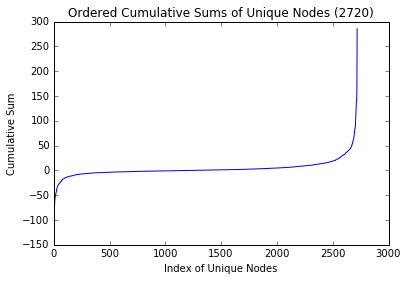

In [13]:
# sorted smallest to largest
node_ssorted_bycumsum = list(map(operator.itemgetter(1), reversed(node_sorted_bycumsum)))
plt.plot(node_ssorted_bycumsum)
plt.ylabel('Cumulative Sum')
plt.xlabel('Index of Unique Nodes')
plt.title('Ordered Cumulative Sums of Unique Nodes ({})'.format(n_unique_nodes))
plt.show()

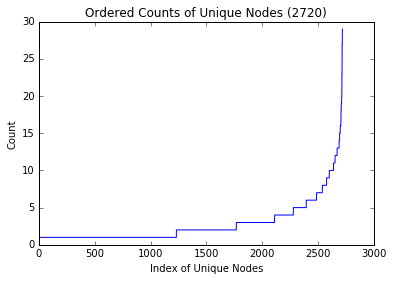

In [14]:
# sorted smallest to largest
node_ssorted_bycount = list(map(operator.itemgetter(1), reversed(node_sorted_bycount)))
plt.plot(node_ssorted_bycount)
plt.ylabel('Count')
plt.xlabel('Index of Unique Nodes')
plt.title('Ordered Counts of Unique Nodes ({})'.format(n_unique_nodes))
plt.show()

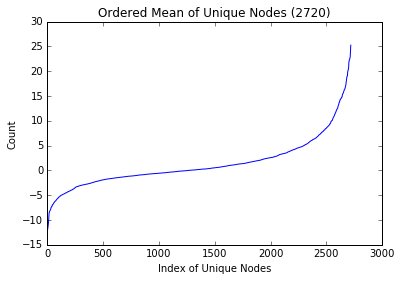

In [15]:
node_sorted_bymean

# sorted smallest to largest
node_ssorted_bymean = list(map(operator.itemgetter(1), reversed(node_sorted_bymean)))
plt.plot(node_ssorted_bymean)
plt.ylabel('Count')
plt.xlabel('Index of Unique Nodes')
plt.title('Ordered Mean of Unique Nodes ({})'.format(n_unique_nodes))
plt.show()